<a href="https://colab.research.google.com/github/etmaca5/Biology/blob/main/Casanova_Etienne_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 8: Cellular size control (or, a most beautiful experiment)

#### **Please read the following instructions carefully before you continue.**

This template notebook is for Homework 8, due Thursday, June 1st, 2023.

To use this template, click `File` > `Save a copy in Drive`. You now have your own editable copy to which you can add your code. However, before you make changes, note that we've scaffolded this notebook to help get you started:

- We've already written `import` statements for all the modules you should need. This week, you could feasibly do everything without importing any external modules; do whatever is most helpful for you.
- We provide an introduction that lays out one potential approach for solving the problem, explaining what each logical "chunk" of your code ought to accomplish. You can use this as a starting point for writing your own code.  

Of course, if you'd rather do your own thing, you are not required to follow the path we've laid out, or use the modules we've recommended. However, a few things _are_ required (refer to the [Intro to Colab](https://colab.research.google.com/drive/1fq_HaiuYb1L18uGcoA3eGs6taiUafR-6?usp=sharing) notebook):

- _Literate style._ Dumping everything into a single, monstrous code cell is illegible and unacceptable. Remember to divide your code into reasonable, logical chunks, and to follow up each code cell with a text cell that explains and interprets the results. Try to minimize copy-and-pasting; instead, define functions and use thoughtful iteration to accomplish repetitive tasks.
- _Comments._ That said, writing "literate" code is not an excuse to avoid writing comments :)
- _Problem labels/numbers._ Please use text cells to clearly label where your solution to one problem ends, and the next begins.

Remember that a human is going to read and grade your notebook, so it is in your best interest to help them understand your work clearly. Your finished solution to a given problem should flow coherently from one code cell to the next. (Our "scaffold" helps you do this!)

If you get stuck, remember that [tutorials](https://bi1.caltech.edu/2023/tutorials) are held in-person each week.

---

## Introduction

This is the last time you'll have to write code for a Bi 1 problem set this term, so we'll keep it short and sweet!

As you work through Problem 2 on this week's set, you'll analyze the results of an incredible experiment we discussed in class in which one of the two flagella on a _Chlamydomonas_ cell was partially amputated -- resulting in a remarkable display of synchronized cellular regeneration.

With your model fleshed out, your task is now to numerically integrate it using the Forward Euler method outlined in lecture. (This can be accomplished succinctly in a single `for` loop).

Your result should be a plot of your solutions: the flagellar length dynamics over time, using the parameters supplied in the problem statement.

Note: because next week's tutorial is dedicated to watching _The Serengeti Rules_, we'll separately release a tutorial-style recording to help you tackle this problem, if you don't already feel equipped to tackle it.

In [ ]:
## relevant imports
import numpy as np
import matplotlib.pyplot as plt

## Question 2g

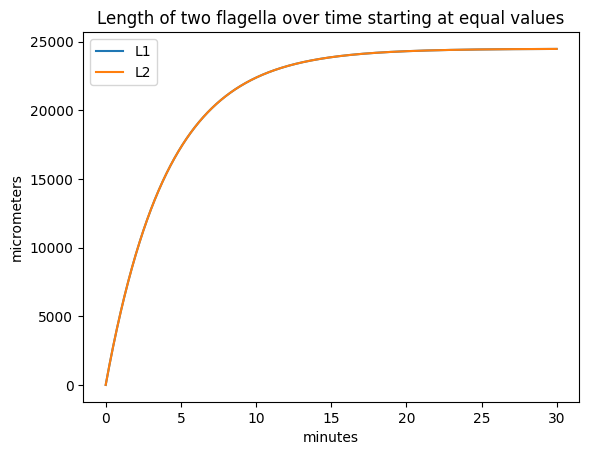

In [ ]:
P = 10 ** 5
k_on = 0.06
k_off = 0.001
D = 1
A = 0.04
c_0 = 0
R = 5
N = 3000
dt = 0.01


def plot_L_vals(L1_0, L2_0, title):
  L1 = np.zeros(N)
  L2 = np.zeros(N)
  L1[0] = L1_0
  L2[0] = L2_0

  for i in range(1, N):
    L1[i] = L1[i - 1] + dt * (k_on * (P - L1[i - 1] - L2[i - 1]) - k_off * (c_0 + L1[i - 1]* R / (D * A)))
    L2[i] = L2[i - 1] + dt * (k_on * (P - L1[i - 1] - L2[i - 1]) - k_off * (c_0 + L2[i - 1]* R / (D * A)))
  x = np.arange(0, N * dt, dt)
  plt.plot(x, L1, '-', label='L1')
  plt.plot(x, L2, label='L2')
  plt.title(title)
  plt.xlabel('minutes')
  plt.ylabel('micrometers')
  plt.legend()
  plt.show()

plot_L_vals(0,0, 'Length of two flagella over time starting at equal values');

The two flagella have the exact same growth path. At the start they both grow at a large rate, then over time the growth rate decreases, until finally around 20 mins the growth rate of both is near 0.

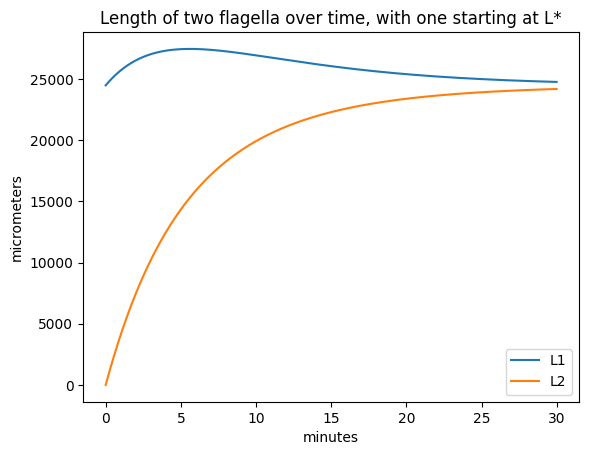

In [ ]:
new_L_star = (k_on * P - k_off * c_0)/ (2 * k_on + k_off * R / (A * D))

plot_L_vals(new_L_star, 0, 'Length of two flagella over time, with one starting at L*')

At first L2 is much smaller than L1, and they are both increasing, although L2 at a much quicker rate then L1, then around 5 minutes in L1 begins to shrink (while the rate of growth of L2 decreases). Then the two flagella begin to converge up until 30 minutes where they have similar lengths (although L1 still larger than L2), and at this point their rate of changes are both are around 0 (stagnant growth/ shrink).

---

### Submission instructions

When you're finished, recall the steps for submitting Colab notebooks:

1. Run all the cells from top-to-bottom, in order (`Runtime` > `Run all`).
2. Once the entire notebook has completed running and the output of all cells is visible, save it (`File` > `Save`).
3. Download the notebook in `.ipynb` format (`File` > `Download` > `Download .ipynb`).
4. Rename the file according to the usual convention (`lastname_firstname_hw#.ipynb`), if you haven't already.
5. Upload the file to Canvas.
